In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Compose
import matplotlib.pyplot as plt
import numpy as np
import time 

### Prepare the data

In [136]:
train_dataset = datasets.CIFAR10(root='data/', download=False, train=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data/', download=False, train=False, transform=ToTensor())

In [193]:
X_train = train_dataset.data
y_train = np.array(train_dataset.targets)

X_test = test_dataset.data
y_test = np.array(test_dataset.targets)

#normalize the data for testing 
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X_train = (X_train/255)
X_test = (X_test/255)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [194]:
train_size = len(X_train)
test_size = len(X_test)

X_train = X_train.reshape((train_size,32*32*3 ))
X_test = X_test.reshape((test_size, 32*32*3))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [201]:
sample_training_size = 10000
X_train = np.array(X_train[0:sample_training_size])
y_train = np.array(y_train[0:sample_training_size])

sample_testing_size = 1000
X_test = np.array(X_test[0:sample_testing_size])
y_test = np.array(y_test[0:sample_testing_size])

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10000, 3072) (1000, 3072)
(10000, 1) (1000, 1)


## Kmeans 

In [207]:
def euclidean_distance(point1, point2): 
    return np.sqrt(np.sum(np.square(point1-point2), axis=1))


class kmeans(): 

    def __init__(self, k, max_iterations=100): 
        super().__init__()
        self.k = k 
        self.centroids = []
        self.max_iterations = max_iterations

    def fit(self, X, y): 
        
        self.X_train = X
        self.y_train = y
        
        self.size = X.shape[0] 
        self.features = len(X[0])
      
        self.init_centroids()
        self.convergence()
      
    def convergence(self): 
        
        convergence = False
        index = 0 
        
        while not convergence: 
            #print(f'current index: {index}')
            index += 1 
            
            self.clusters = self.init_clusters()
            
            prev_centroids = self.centroids 
            self.centroids = self.new_centroids(self.clusters)
            
            if(index == self.max_iterations): 
                convergence = True 
            
            if (self.centroids == prev_centroids).all():
                convergence = True 
                #print(f"Kmeans converged after {idx} iterations")
     
                
    def init_centroids(self): 
        
        for i in range(self.k): 
            centroid_index = np.random.choice(self.size)
            centroid = self.X_train[centroid_index]
            self.centroids.append(centroid)
            

    def init_clusters(self): 
        clusters = [[] for i in range(self.k)]

        for point_index, point in enumerate(self.X_train): 
            distance_between = euclidean_distance(point, self.centroids)            
            closest_clusters = np.argmin(distance_between)
            clusters[closest_clusters].append(point_index)
        
        return clusters 
        
    def new_centroids(self, clusters):
        temp_centroids = np.empty((self.k, self.features)) 

        for cluster_index, cluster in enumerate(clusters):
            centroid_mean = np.mean(self.X_train[cluster], axis=0)
            temp_centroids[cluster_index] = centroid_mean 
        
        return temp_centroids 

    def predict_cluster(self, X):

        cluster_sizes = []

        for item in self.clusters: 
            cluster_sizes.append(len(item))

        print(cluster_sizes)

        y_pred = np.empty(X.shape[0])
        bucket = []

        for cluster in self.clusters:
            temp_label = [self.y_train[i] for i in cluster]
            most_common = np.ravel(temp_label)
            count = np.bincount(most_common) 
            most_popular = np.argmax(count)
            bucket.append(most_popular)
            
        print(bucket)
      
        for sample_index, sample in enumerate(X): 
            distance_between = euclidean_distance(self.centroids, sample)
            cluster_index = np.argmin(distance_between)
            y_pred[sample_index] = bucket[cluster_index]
      
        return y_pred.reshape(-1,1).astype(int)  


In [189]:
classes = train_dataset.classes

def overall_accuracy(y_pred, y_score): 
  total_pred = np.zeros(10)
  correct_pred = np.zeros(10)

  for label, prediction in zip(y_score, y_pred):
    if label[0] == prediction[0]:
      correct_pred[label[0]] += 1 
    total_pred[label[0]] += 1 

  #overall accuracy 
  num_correct = np.sum(y_pred == y_score)
  overall_acc = float(num_correct) / y_score.shape[0]
  
  print(f'Accuracy {num_correct} / { y_score.shape[0]} correct: {overall_acc}')
  print('------------------------------------------------')
  # print accuracy for each class
  for i in range(10):
      accuracy = 100 * float(correct_pred[i]) / total_pred[i]
      print(f'Accuracy for class: {classes[i]} is {correct_pred[i].astype(int)}/{total_pred[i].astype(int)}: {accuracy:.2f} % ')

In [208]:
np.random.seed(22)

print("Testing on subset of data")
start_time = time.time()

print("Starting Training ")
print(f"training size: {X_train.shape[0]} testing size: {X_test.shape[0]}")
print()

model = kmeans(5, 20)
model.fit(X_train,y_train)


total_time = time.time() - start_time 
print('Training completed in {:.0f}m {:.0f}s'.format(total_time // 60, total_time % 60))

Testing on subset of data
Starting Training 
training size: 10000 testing size: 1000

current index: 0
current index: 1
current index: 2
current index: 3
current index: 4
current index: 5
current index: 6
current index: 7
current index: 8
current index: 9
current index: 10
current index: 11
current index: 12
current index: 13
current index: 14
current index: 15
current index: 16
current index: 17
current index: 18
current index: 19
Training completed in 0m 9s


In [209]:
y_pred = model.predict_cluster(X_test)  
overall_accuracy(y_pred, y_test)

[1904, 2377, 2343, 1537, 1839]
[5, 6, 7, 0, 8]
Accuracy 221 / 1000 correct: 0.221
------------------------------------------------
Accuracy for class: airplane is 40/103: 38.83 % 
Accuracy for class: automobile is 0/89: 0.00 % 
Accuracy for class: bird is 0/100: 0.00 % 
Accuracy for class: cat is 0/103: 0.00 % 
Accuracy for class: deer is 0/90: 0.00 % 
Accuracy for class: dog is 32/86: 37.21 % 
Accuracy for class: frog is 51/112: 45.54 % 
Accuracy for class: horse is 37/102: 36.27 % 
Accuracy for class: ship is 61/106: 57.55 % 
Accuracy for class: truck is 0/109: 0.00 % 


In [141]:
print(np.sum(y_pred == y_test)/len(y_test))

temp = np.random.choice(range(len([1,2,3,5,7])))
print(temp)

0.101
1


In [206]:
print(X_train.shape[0])
print(np.random.choice(X_train.shape[0]))
print(X_train[5328])
print(len(X_train[0]))

10000
9181
[0.40392157 0.42352941 0.48627451 ... 0.83137255 0.65098039 0.54509804]
3072


## Cross Fold Validation 

In [84]:
total_folds = 5
knn_values = [3,5,7,11]

print(X_train.shape)
print(y_train.shape)

X_train_fold = np.array_split(X_train, total_folds)
y_train_fold = np.array_split(y_train, total_folds)

print(len(X_train_fold))
print(len(y_train_fold[0]))

(50000, 3072)
(50000, 1)
5
10000


In [88]:
k_accuraces = []
subset_accuraces = [] 

print("Starting K-Fold Testing")
start_time = time.time() 
for k in knn_values: 
  
  current_k = []

  #print(f'Current K: {k}'); 
  for fold in range(total_folds):
    start_time = time.time()
    #print(f'Current fold: {fold}')

    X_train = []
    y_train = []
    
    for i in [x for x in range(total_folds) if x != fold]: 
      X_train.append(X_train_fold[i])
      y_train.append(y_train_fold[i])

  
    #define training and test set 
    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    X_test = X_train_fold[fold]
    y_test = y_train_fold[fold]

    #define model 
    model = kmeans(k)

    model.fit(X_train, y_train) 

    #determine the accuracy 
    predictions = model.predict_cluster(X_test)  

    num_correct = np.sum(predictions == y_test)
    overall_acc = float(num_correct) / y_test.shape[0]

    current_k.append(overall_acc)

    total_time = time.time() - start_time 
    print(f'K: {k:02d}, cv: {fold}, Runtime: {total_time//60:.0f}m {total_time % 60:.0f}s , Accuracy: {overall_acc}')
  
  #could define a subset of accuraries as well, but would take additional time


  k_accuraces.append(current_k)

total_time = time.time() - start_time 

print('KFold completed in {:.0f}m {:.0f}s'.format(total_time // 60, total_time % 60))

Starting K-Fold Testing
[17363, 14297, 8340]
[6, 9, 0]
K: 03, cv: 0, Runtime: 1m 2s , Accuracy: 0.183
[8396, 17652, 13952]
[0, 6, 9]
K: 03, cv: 1, Runtime: 1m 9s , Accuracy: 0.1708
[8271, 14283, 17446]
[0, 9, 6]
K: 03, cv: 2, Runtime: 1m 21s , Accuracy: 0.1797
[8163, 14148, 17689]
[0, 9, 6]
K: 03, cv: 3, Runtime: 1m 41s , Accuracy: 0.1725
[17523, 8087, 14390]
[6, 0, 9]
K: 03, cv: 4, Runtime: 2m 29s , Accuracy: 0.1787
[9549, 8471, 4961, 9537, 7482]
[5, 6, 0, 1, 8]
K: 05, cv: 0, Runtime: 2m 43s , Accuracy: 0.1938
[7255, 5075, 11115, 9297, 7258]
[6, 0, 5, 9, 7]
K: 05, cv: 1, Runtime: 2m 8s , Accuracy: 0.1808
[7027, 5088, 9278, 7518, 11089]
[6, 0, 9, 5, 4]
K: 05, cv: 2, Runtime: 2m 33s , Accuracy: 0.1889
[9362, 8430, 5033, 9529, 7646]
[1, 6, 0, 5, 8]
K: 05, cv: 3, Runtime: 2m 3s , Accuracy: 0.1852
[7427, 11154, 7197, 9229, 4993]
[7, 5, 6, 9, 0]
K: 05, cv: 4, Runtime: 2m 47s , Accuracy: 0.1877
[7231, 6090, 5877, 5268, 6243, 5651, 3640]
[9, 6, 8, 8, 2, 4, 0]
K: 07, cv: 0, Runtime: 3m 11s , A

In [89]:
print('Overall K-Fold Accuracies K-means ')
print('')

overall_fold_accuracy = []


for index, data in enumerate(k_accuraces):
  overall_fold_accuracy.append(np.sum(data)/len(data))

for k, accuracy in zip(knn_values, overall_fold_accuracy): 
  print(f'k:{k:02d}, Overall Accuracy:{accuracy:.4f}')

Overall K-Fold Accuracies K-means 

k:03, Overall Accuracy:0.1769
k:05, Overall Accuracy:0.1873
k:07, Overall Accuracy:0.1979
k:11, Overall Accuracy:0.2342


## Test Accuracy 

In [195]:
k_values = [3,5,7,11] 

for item in k_values: 

    print(f"Testing Accuracy for {item}")
    model = kmeans(item)
    start_time = time.time()


    print(f"training size: {X_train.shape[0]} testing size: {X_test.shape[0]}")
    model.fit(X_train, y_train) 

    #determine the accuracy 
    total_time = time.time() - start_time 
    print('Training completed in {:.0f}m {:.0f}s'.format(total_time // 60, total_time % 60))
    
    predictions = model.predict_cluster(X_test)  
    overall_accuracy(predictions, y_test)


Testing Accuracy for 3
training size: 50000 testing size: 10000
Training completed in 3m 5s
[17848, 21859, 10293]
[9, 6, 0]
Accuracy 1753 / 10000 correct: 0.1753
------------------------------------------------
Accuracy for class: airplane is 492/1000: 49.20 % 
Accuracy for class: automobile is 0/1000: 0.00 % 
Accuracy for class: bird is 0/1000: 0.00 % 
Accuracy for class: cat is 0/1000: 0.00 % 
Accuracy for class: deer is 0/1000: 0.00 % 
Accuracy for class: dog is 0/1000: 0.00 % 
Accuracy for class: frog is 642/1000: 64.20 % 
Accuracy for class: horse is 0/1000: 0.00 % 
Accuracy for class: ship is 0/1000: 0.00 % 
Accuracy for class: truck is 619/1000: 61.90 % 
Testing Accuracy for 5
training size: 50000 testing size: 10000
Training completed in 3m 4s
[11896, 9498, 6270, 10511, 11825]
[5, 8, 0, 6, 1]
Accuracy 1973 / 10000 correct: 0.1973
------------------------------------------------
Accuracy for class: airplane is 391/1000: 39.10 % 
Accuracy for class: automobile is 316/1000: 31.60 

## Plot the Graph 

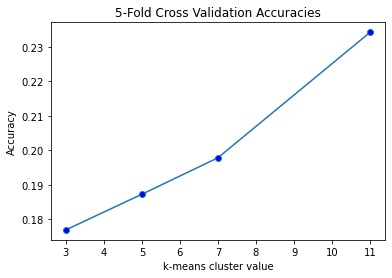

In [197]:
x_points = knn_values
y_points = overall_fold_accuracy

# plotting the points
plt.plot(x_points, y_points, marker='o', markerfacecolor='blue', markersize=6)

plt.xlabel('k-means cluster value')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation Accuracies')
 
# function to show the plot
plt.show()